# Road accident risk

**Our mission:** Predicting the likelihood of accidents on different types of roads.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### Data Upload

In [2]:
train = pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\Kaggle\\Predicting Road Accident Risk\\train.csv') 
test = pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\Kaggle\\Predicting Road Accident Risk\\test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape) 
print(train.head())

Train shape: (517754, 14)
Test shape: (172585, 13)
   id road_type  num_lanes  curvature  speed_limit  lighting weather  \
0   0     urban          2       0.06           35  daylight   rainy   
1   1     urban          4       0.99           35  daylight   clear   
2   2     rural          4       0.63           70       dim   clear   
3   3   highway          4       0.07           35       dim   rainy   
4   4     rural          1       0.58           60  daylight   foggy   

   road_signs_present  public_road time_of_day  holiday  school_season  \
0               False         True   afternoon    False           True   
1                True        False     evening     True           True   
2               False         True     morning     True          False   
3                True         True     morning    False          False   
4               False        False     evening     True          False   

   num_reported_accidents  accident_risk  
0                       1   

### EDA Exploratory Data Analysis

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [4]:
train.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [5]:
train.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [8]:
print("Road Type:")
print(train['road_type'].value_counts())
print("\nPercentage Distribution:")
print(train['road_type'].value_counts(normalize=True) * 100)

Road Type:
road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64

Percentage Distribution:
road_type
highway    33.543343
rural      33.359279
urban      33.097378
Name: proportion, dtype: float64


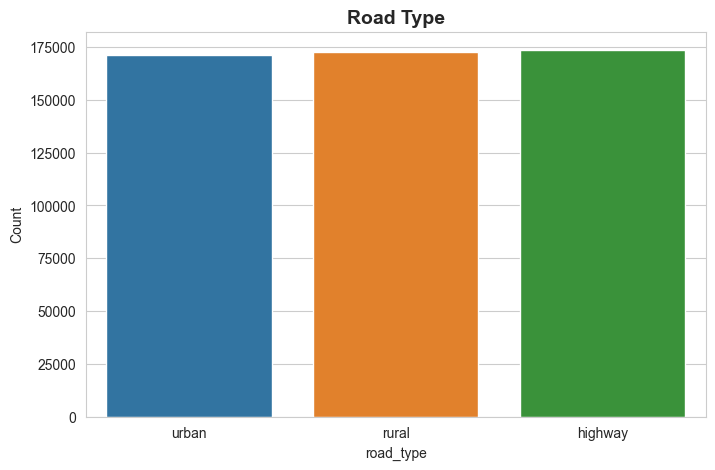

In [50]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='road_type', palette='tab10')
plt.title('Road Type', fontsize=14, fontweight='bold')
plt.xlabel('road_type')
plt.ylabel('Count')
plt.show()

In [9]:
print("Weather:")
print(train['weather'].value_counts())
print("\nPercentage Distribution:")
print(train['weather'].value_counts(normalize=True) * 100)

Weather:
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64

Percentage Distribution:
weather
foggy    35.048112
clear    34.631505
rainy    30.320384
Name: proportion, dtype: float64


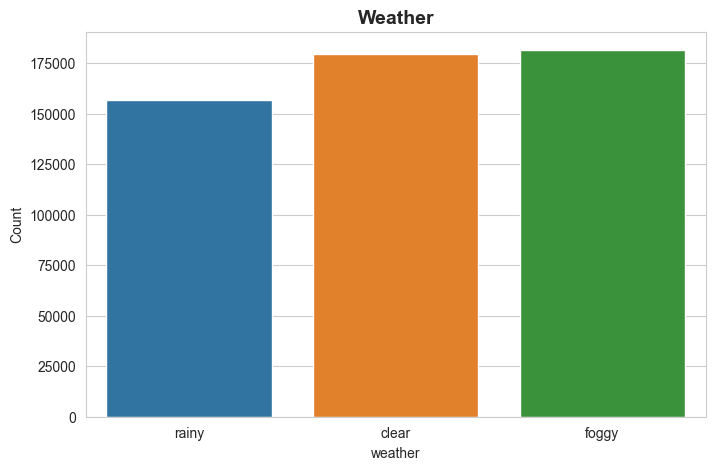

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='weather', palette='tab10')
plt.title('Weather', fontsize=14, fontweight='bold')
plt.xlabel('weather')
plt.ylabel('Count')
plt.show()

In [12]:
print("Lighting:")
print(train['lighting'].value_counts())
print("\nPercentage Distribution:")
print(train['lighting'].value_counts(normalize=True) * 100)

Lighting:
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64

Percentage Distribution:
lighting
dim         35.504506
daylight    34.382158
night       30.113336
Name: proportion, dtype: float64


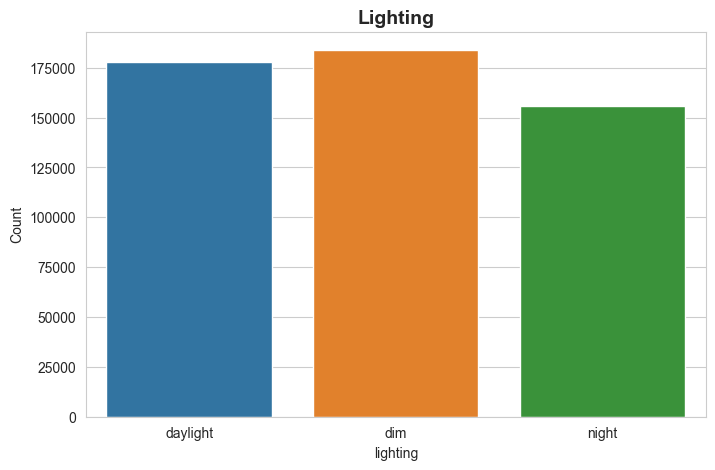

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='lighting', palette='tab10')
plt.title('Lighting', fontsize=14, fontweight='bold')
plt.xlabel('lighting')
plt.ylabel('Count')
plt.show()

In [14]:
print("Time Zone:")
print(train['time_of_day'].value_counts())
print("\nPercentage Distribution:")
print(train['time_of_day'].value_counts(normalize=True) * 100)

Time Zone:
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64

Percentage Distribution:
time_of_day
morning      33.492740
evening      33.382069
afternoon    33.125191
Name: proportion, dtype: float64


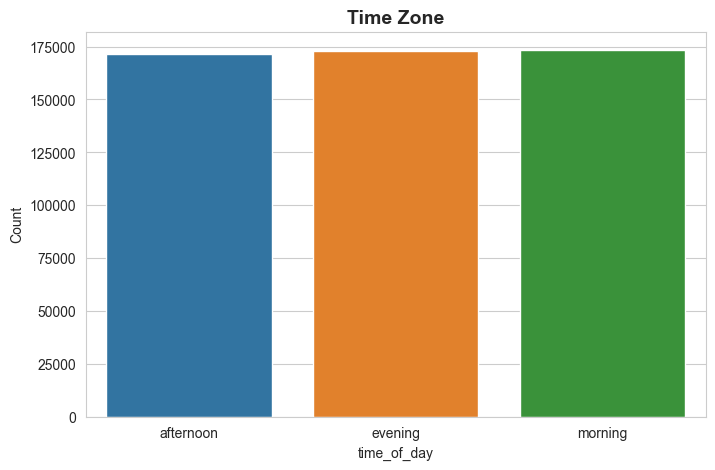

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='time_of_day', palette='tab10')
plt.title('Time Zone', fontsize=14, fontweight='bold')
plt.xlabel('time_of_day')
plt.ylabel('Count')
plt.show()

In [16]:
print("Number of Lanes:")
print(train['num_lanes'].value_counts())
print("\nPercentage Distribution:")
print(train['num_lanes'].value_counts(normalize=True) * 100)

Number of Lanes:
num_lanes
1    131168
2    130054
4    129118
3    127414
Name: count, dtype: int64

Percentage Distribution:
num_lanes
1    25.334039
2    25.118879
4    24.938098
3    24.608984
Name: proportion, dtype: float64


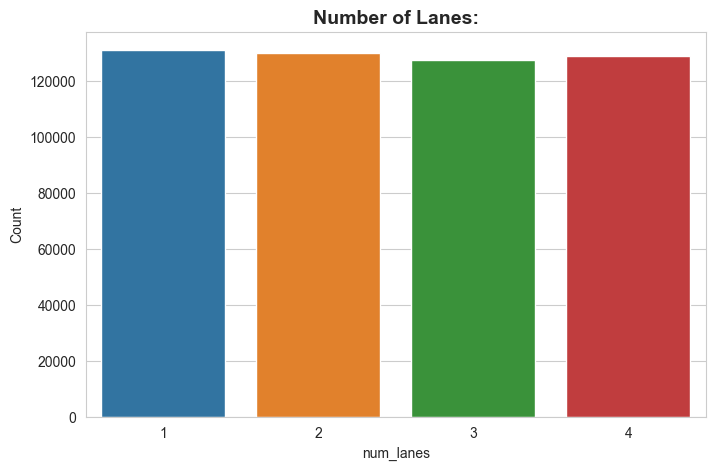

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='num_lanes', palette='tab10')
plt.title('Number of Lanes:', fontsize=14, fontweight='bold')
plt.xlabel('num_lanes')
plt.ylabel('Count')
plt.show()


--- Target Variable Distribution ---
accident_risk
0.34    15542
0.32    14240
0.37    13453
0.28    13287
0.39    12499
        ...  
0.94       47
0.97       28
0.96       28
0.90       26
0.93       23
Name: count, Length: 98, dtype: int64



--- Target Variable Distribution ---
accident_risk
0.34    15542
0.32    14240
0.37    13453
0.28    13287
0.39    12499
        ...  
0.94       47
0.97       28
0.96       28
0.90       26
0.93       23
Name: count, Length: 98, dtype: int64


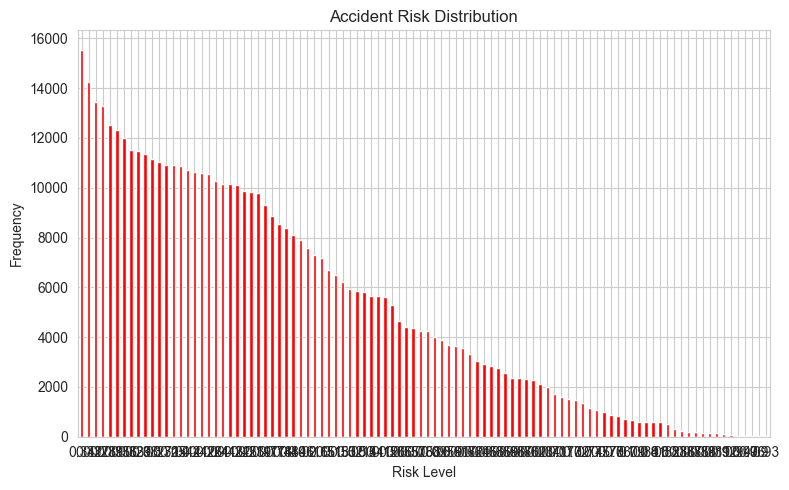

In [48]:
print("\n--- Target Variable Distribution ---")
if 'accident_risk' in train.columns:
    print(train['accident_risk'].value_counts())
    
    plt.figure(figsize=(8, 5))
    train['accident_risk'].value_counts().plot(kind='bar', color='red')
    plt.title('Accident Risk Distribution')
    plt.xlabel('Risk Level')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [19]:
# Separate numerical and categorical variables
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'accident_risk' in numeric_cols:
    numeric_cols.remove('accident_risk')

In [20]:
print("\n--- Numerical Variables ---")
print(numeric_cols)

print("\n--- Categorical Variables ---")
print(categorical_cols)


--- Numerical Variables ---
['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

--- Categorical Variables ---
['road_type', 'lighting', 'weather', 'time_of_day']


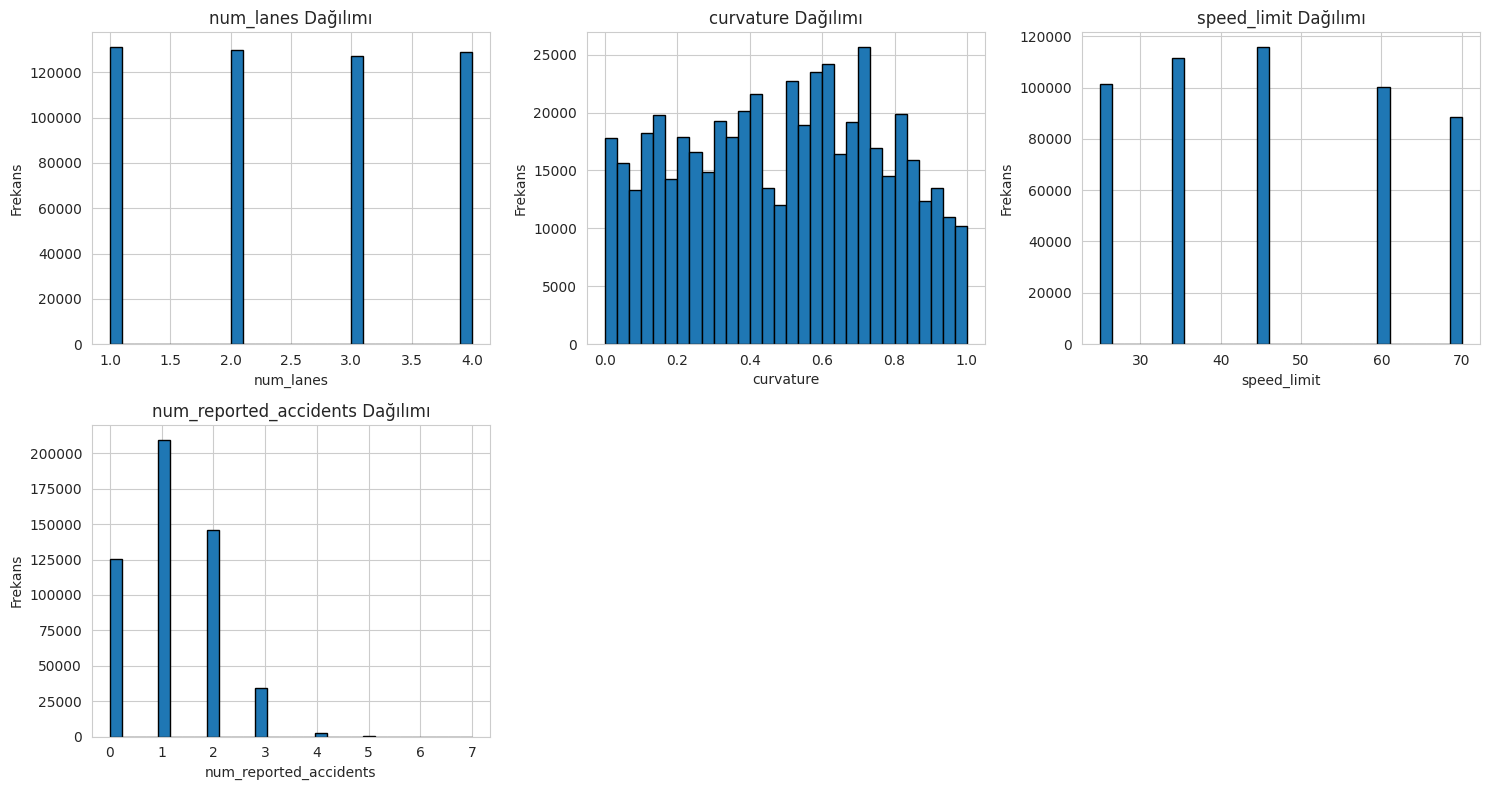

In [19]:
# Sayısal değişkenlerin histogramları
if len(numeric_cols) > 0:
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, n_rows * 4))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        train[col].hist(bins=30, edgecolor='black')
        plt.title(f'{col} Dağılımı')
        plt.xlabel(col)
        plt.ylabel('Frekans')
    plt.tight_layout()
    plt.show()

In [21]:
# Save the ID
train_ids = train['id'] if 'id' in train.columns else None
test_ids = test['id'] if 'id' in test.columns else None

In [22]:
# Remove ID columns
if 'id' in train.columns:
    train = train.drop('id', axis=1)
if 'id' in test.columns:
    test = test.drop('id', axis=1)

In [23]:

# Separate target variable
if 'accident_risk' in train.columns:
    y = train['accident_risk']
    X = train.drop('accident_risk', axis=1)
else:
    print("Warning: Target variable not found!")
    y = None
    X = train.copy()

In [24]:
# Encode categorical variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col].astype(str))
    
    if col in test.columns:
        test[col] = test[col].astype(str)
        # If there are new categories in the test set, assign the most frequent one
        test[col] = test[col].apply(lambda x: x if x in label_encoders[col].classes_ else label_encoders[col].classes_[0])
        test[col] = label_encoders[col].transform(test[col])


In [25]:
for col in X.columns:
    if X[col].isnull().sum() > 0:
        X[col].fillna(X[col].mean(), inplace=True)

for col in test.columns:
    if test[col].isnull().sum() > 0:
        test[col].fillna(test[col].mean(), inplace=True)

print("Missing values have been filled.")

Missing values have been filled.


In [26]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")


Training set: (414203, 12)
Validation set: (103551, 12)


### Model Training

In [28]:
# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)

In [29]:
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [30]:
# Predictions
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
    

In [31]:
print("\n--- Training Set Performance ---")
print(f"MSE: {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"R² Score: {r2_score(y_train, y_pred_train):.4f}")


--- Training Set Performance ---
MSE: 0.0031
RMSE: 0.0555
MAE: 0.0432
R² Score: 0.8887


In [32]:
print("\n--- Validation Set Performance ---")
print(f"MSE: {mean_squared_error(y_val, y_pred_val):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val)):.4f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred_val):.4f}")
print(f"R² Score: {r2_score(y_val, y_pred_val):.4f}")


--- Validation Set Performance ---
MSE: 0.0032
RMSE: 0.0563
MAE: 0.0436
R² Score: 0.8858


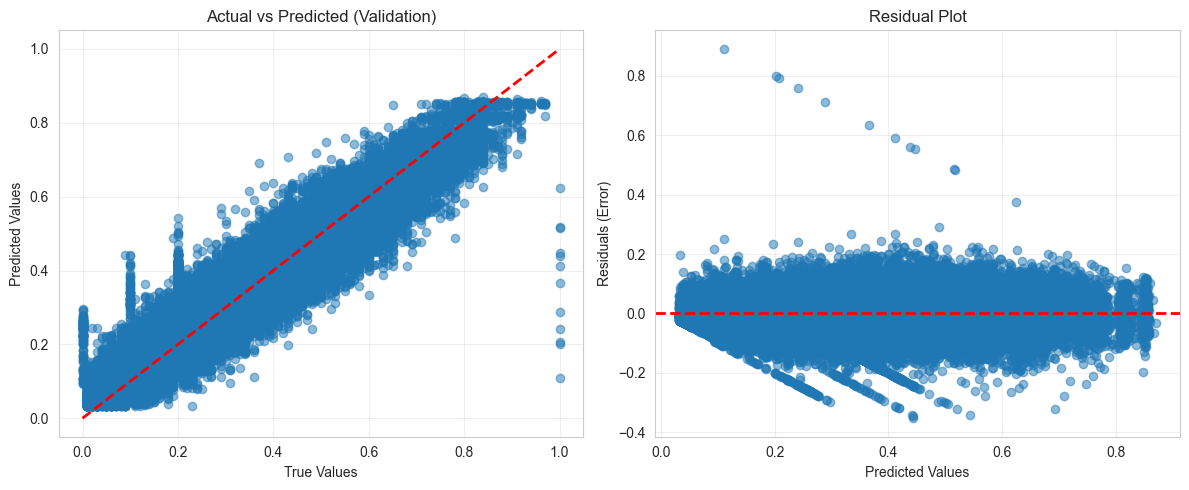

In [33]:

# Actual vs Predicted Chart
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Validation)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_val - y_pred_val
plt.scatter(y_pred_val, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [34]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n--- Top 10 Most Important Features ---")
print(feature_importance.head(10))


--- Top 10 Most Important Features ---
                   feature  importance
2                curvature    0.366886
4                 lighting    0.267283
3              speed_limit    0.251760
5                  weather    0.076134
11  num_reported_accidents    0.036352
9                  holiday    0.000348
1                num_lanes    0.000322
7              public_road    0.000292
0                road_type    0.000201
8              time_of_day    0.000196


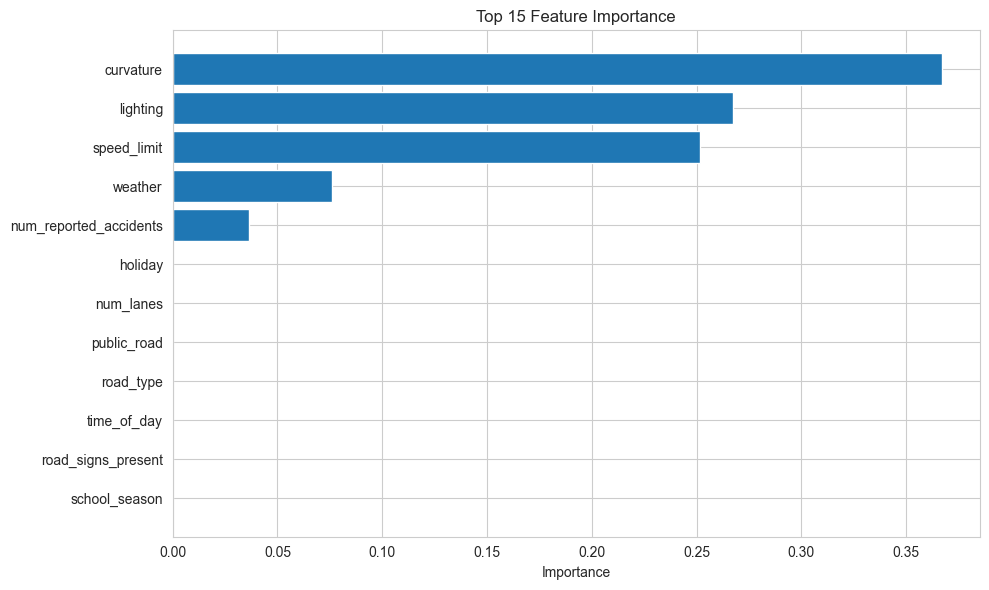

In [35]:
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Test set predictions

In [36]:
test_predictions = model.predict(test_scaled)

print(f"\nNumber of predictions in the test set: {len(test_predictions)}")
print("\nPrediction statistics:")
print(f"Min: {test_predictions.min():.4f}")
print(f"Max: {test_predictions.max():.4f}")
print(f"Mean: {test_predictions.mean():.4f}")
print(f"Median: {np.median(test_predictions):.4f}")
print(f"Std: {test_predictions.std():.4f}")


Number of predictions in the test set: 172585

Prediction statistics:
Min: 0.0317
Max: 0.8673
Mean: 0.3517
Median: 0.3381
Std: 0.1569


In [37]:
sonuc=pd.DataFrame()
if len(test_predictions.shape) > 1:
    test_predictions = test_predictions.flatten()
sonuc['accident_risk']=test_predictions

In [38]:
test_cp = pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\Kaggle\\Predicting Road Accident Risk\\test.csv')
test_cp

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,690334,rural,2,0.01,45,dim,rainy,False,False,afternoon,True,True,2
172581,690335,rural,1,0.74,70,daylight,foggy,False,True,afternoon,False,False,2
172582,690336,urban,2,0.14,70,dim,clear,False,False,evening,True,True,1
172583,690337,urban,1,0.09,45,daylight,foggy,True,True,morning,False,True,0


In [39]:
sonuc['id']=test_cp['id']

In [40]:
sonuc['accident_risk']=sonuc['accident_risk'].astype('int32')

In [41]:
sonuc.to_csv('sonuc.csv',index=False)
